In [1]:
%run DMD_functions.ipynb

**Umjetni primjer**

In [2]:
N=300
m=10
x=np.random.rand(N)
A=np.random.rand(N,N)
A = A/np.linalg.norm(A, 2)

In [3]:
X=np.empty((N,m+1))
X[:,0]=x
for i in range(m):
    X[:,i+1]=A@X[:,i]
X=X+np.random.rand(N,m+1)/N

In [4]:
Z, L = DMD(X[:,:m], X[:, 1:], N*np.finfo(float).resolution)

L

array([ 0.99883187+0.j        ,  0.40113529+0.64356908j,
        0.40113529-0.64356908j, -0.80125127+0.j        ,
       -0.47467367+0.60331412j, -0.47467367-0.60331412j,
        0.06927204+0.j        , -0.03046487+0.j        ,
       -0.03655837+0.49472614j, -0.03655837-0.49472614j])

In [5]:
#permutirani podaci - druge eigenvalues - kao što bi i očekivali!
print(X[:5,[1,6,8,9]])
temp=X[:,[1,6,8,9]]
X[:,[6,9]] = temp[:,[0,2]]
X[:,[1,8]] = temp[:,[1,3]]
print(X[:5,[1,6,8,9]])

Z_perm, L_perm = DMD(X[:,:m], X[:, 1:], N*np.finfo(float).resolution)

L_perm


[[0.49741554 0.4893362  0.49082891 0.48768764]
 [0.49261384 0.47127387 0.4705554  0.47167331]
 [0.47396208 0.47006592 0.47116649 0.47093048]
 [0.50330459 0.50476763 0.5033382  0.49997358]
 [0.51200239 0.48702359 0.48712558 0.48672512]]
[[0.4893362  0.49741554 0.48768764 0.49082891]
 [0.47127387 0.49261384 0.47167331 0.4705554 ]
 [0.47006592 0.47396208 0.47093048 0.47116649]
 [0.50476763 0.50330459 0.49997358 0.5033382 ]
 [0.48702359 0.51200239 0.48672512 0.48712558]]


array([ 0.9989212 +0.j        ,  0.50496555+0.58279068j,
        0.50496555-0.58279068j,  0.19237743+0.69713625j,
        0.19237743-0.69713625j,  0.00133974+0.j        ,
       -0.44934475+0.7239907j , -0.44934475-0.7239907j ,
       -0.65452637+0.19420073j, -0.65452637-0.19420073j])

In [6]:
Ze, Le = DMD_exact(X[:,:m], X[:, 1:], N*np.finfo(float).resolution)
Le
#isto kao L?

array([ 0.9989212 +0.j        ,  0.50496555+0.58279068j,
        0.50496555-0.58279068j,  0.19237743+0.69713625j,
        0.19237743-0.69713625j,  0.00133974+0.j        ,
       -0.44934475+0.7239907j , -0.44934475-0.7239907j ,
       -0.65452637+0.19420073j, -0.65452637-0.19420073j])

In [7]:
Zg, Lg, rg = GEDMD(X[:,:m], X[:,1:], N*np.finfo(float).resolution)
Lg

array([ 0.9989212 +0.j        ,  0.50496555+0.58279068j,
        0.50496555-0.58279068j,  0.19237743+0.69713625j,
        0.19237743-0.69713625j,  0.00133974+0.j        ,
       -0.44934475+0.7239907j , -0.44934475-0.7239907j ,
       -0.65452637+0.19420073j, -0.65452637-0.19420073j])

In [9]:
Z_qr, L_qr, r_qr, Q, R = GEDMDQ(X, N*np.finfo(float).resolution)
print(L_qr)

B = (A@X[:,m]+np.random.rand(N)/N).reshape((-1,1))

Z_added, L_added, r_added, _,_ = DMD_added_snap(B, Q, R, N*np.finfo(float).resolution)
print(L_added)

#provjera.. - dobije se isto
_,L_added_direct,_,_,_ = GEDMDQ(np.concatenate((X, B), axis=1), N*np.finfo(float).resolution)
print(L_added_direct)

print(np.allclose(L_added, L_added_direct))


[ 0.9989212 +0.j          0.50496555+0.58279068j  0.50496555-0.58279068j
  0.19237743+0.69713625j  0.19237743-0.69713625j  0.00133974+0.j
 -0.44934475+0.7239907j  -0.44934475-0.7239907j  -0.65452637+0.19420073j
 -0.65452637-0.19420073j]
[ 9.99657073e-01+0.j          6.87188797e-01+0.52887751j
  6.87188797e-01-0.52887751j  2.33014495e-01+0.79479268j
  2.33014495e-01-0.79479268j -2.94710952e-01+0.80013423j
 -2.94710952e-01-0.80013423j -3.85545868e-04+0.j
 -7.51954703e-01+0.j         -6.71726551e-01+0.39818674j
 -6.71726551e-01-0.39818674j]
[ 9.99657073e-01+0.j          6.87188797e-01+0.52887751j
  6.87188797e-01-0.52887751j  2.33014495e-01+0.79479268j
  2.33014495e-01-0.79479268j -2.94710952e-01+0.80013423j
 -2.94710952e-01-0.80013423j -3.85545868e-04+0.j
 -7.51954703e-01+0.j         -6.71726551e-01+0.39818674j
 -6.71726551e-01-0.39818674j]
True


In [10]:
Z_qr, L_qr, r_qr, Q, R = GEDMDQ(X, N*np.finfo(float).resolution)
print(L_qr)

l=2

Z_disc, L_disc, r_disc, _,_,_ = DMD_discarding_snap(l, Q, R, N*np.finfo(float).resolution)
print(L_added)

#provjera.. - dobije se isto
_,L_discarded_direct,_,_,_ = GEDMDQ(X[:,l:], N*np.finfo(float).resolution)
print(L_added_direct)

print(np.allclose(L_added, L_added_direct))

[ 0.9989212 +0.j          0.50496555+0.58279068j  0.50496555-0.58279068j
  0.19237743+0.69713625j  0.19237743-0.69713625j  0.00133974+0.j
 -0.44934475+0.7239907j  -0.44934475-0.7239907j  -0.65452637+0.19420073j
 -0.65452637-0.19420073j]
[ 9.99657073e-01+0.j          6.87188797e-01+0.52887751j
  6.87188797e-01-0.52887751j  2.33014495e-01+0.79479268j
  2.33014495e-01-0.79479268j -2.94710952e-01+0.80013423j
 -2.94710952e-01-0.80013423j -3.85545868e-04+0.j
 -7.51954703e-01+0.j         -6.71726551e-01+0.39818674j
 -6.71726551e-01-0.39818674j]
[ 9.99657073e-01+0.j          6.87188797e-01+0.52887751j
  6.87188797e-01-0.52887751j  2.33014495e-01+0.79479268j
  2.33014495e-01-0.79479268j -2.94710952e-01+0.80013423j
 -2.94710952e-01-0.80013423j -3.85545868e-04+0.j
 -7.51954703e-01+0.j         -6.71726551e-01+0.39818674j
 -6.71726551e-01-0.39818674j]
True


In [11]:
np.linalg.eigvals(A)[:10]

array([0.99880954+0.j        , 0.01007374+0.03253259j,
       0.01007374-0.03253259j, 0.01326195+0.03084459j,
       0.01326195-0.03084459j, 0.00247303+0.03264277j,
       0.00247303-0.03264277j, 0.00625716+0.03205265j,
       0.00625716-0.03205265j, 0.02346346+0.0231409j ])

In [12]:
#!pip install pydmd

In [13]:
import pydmd
dmd1 = pydmd.DMD(svd_rank=10)
dmd1.fit(X[:,:m], X[:,1:])
dmd1.eigs

array([ 0.9989212 +0.j        ,  0.50496555+0.58279068j,
        0.50496555-0.58279068j,  0.19237743+0.69713625j,
        0.19237743-0.69713625j,  0.00133974+0.j        ,
       -0.44934475+0.7239907j , -0.44934475-0.7239907j ,
       -0.65452637+0.19420073j, -0.65452637-0.19420073j])

In [14]:
for i in range(dmd1.eigs.shape[0]):
    print(np.linalg.norm(dmd1.reconstructed_data[:,i]-X[:,i]))

6.3993722616636454e-15
1.2740441060310108e-14
1.6013986202984265e-14
3.44368760997327e-14
4.432317285810801e-14
5.691821244203405e-14
6.731739484524525e-14
7.692586383425611e-14
8.728355412327719e-14
1.0071718199673042e-13


In [15]:
dmd1.reconstructed_data.shape

(300, 10)

In [16]:
#usporedi s rezultatima lin regresije...

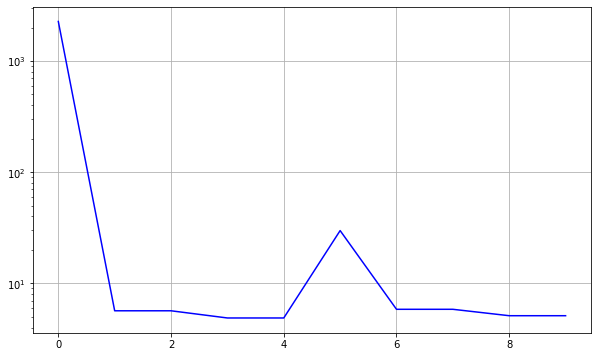

In [17]:
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(1/r_qr, marker='', linestyle='-', color='b')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.grid(True)
plt.show()

In [18]:
threshold=5
indices = np.where(1/r_qr > threshold)[0]
print(indices, indices.shape)

[0 1 2 5 6 7 8 9] (8,)


In [20]:
times=[j for j in range (X.shape[1])]
s = DMD_reconstruction(X, Z_qr, indices, L_qr, times)
for i in range(m):
    print("norma razlike:", np.linalg.norm(s[:,i]-X[:,i]))

norma razlike: 0.07519662668990232
norma razlike: 0.060062481456737794
norma razlike: 0.05004217316157655
norma razlike: 0.028167293210787665
norma razlike: 0.0700256140172047
norma razlike: 0.010957157121710985
norma razlike: 0.07620065792451189
norma razlike: 0.03689893936326097
norma razlike: 0.03600152673661426
norma razlike: 0.014843723978332337


c:\Users\elawi\miniconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


*proba za funkcije...*

In [45]:
#QR za (X Y) kad X i Y imaju "istu jezgru"
N=20; m=7
A = np.random.rand(N,N)
A=A/np.linalg.norm(A)
x = np.ones((N))
X=np.empty((N,m+1))
X[:,0] = x
for i in range(m):
    X[:,i+1]= A @ X[:,i]
#print(X)

Z = np.concatenate((X[:,:m], X[:,1:]), axis=1)
print(Z.shape)

Q, R = np.linalg.qr(Z, mode="reduced")

R_12 = R[:m,m:]
R_22 = R[m:2*m, m:]

Q_1 = Q[:,:m]
Q_2 = Q[:,m:]


print(np.allclose(X[:,1:],Q_1@R_12 + Q_2@R_22))
print(np.allclose(X[:,1:],Q_1@R_12 + Q_2*R_22[:,m-1]))
print(R_22)
print(R.shape)

(20, 14)
True
True
[[ 0. -0. -0.  0. -0.  0. -0.]
 [ 0.  0. -0.  0.  0.  0. -0.]
 [ 0.  0. -0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -0. -0.]
 [ 0.  0.  0.  0.  0. -0.  0.]
 [ 0.  0.  0.  0.  0.  0. -0.]]
(14, 14)


In [46]:
"""HH transformacija - proba s kvadratnom matricom koja skoro gornje trokutasta (dvije sporedne diag ne-nula)"""
dim_trapez_m = 6

np.set_printoptions(precision=8, suppress=True)

trapez_m = np.random.rand(dim_trapez_m,dim_trapez_m)
trapez_m = np.triu(trapez_m, -2)
print(trapez_m)
trapez_copy = trapez_m.copy()
v_all=np.empty((3,dim_trapez_m-1))
#hh1 = np.eye(dim_trapez_m, dim_trapez_m)


#HH transf od R (trapezoidalna) 
#### racun od HH matrice ("Q") bi se mogao i ovdje dogoditi - primjena transformacija na I i onda uzmemo transponirano
for i in range(dim_trapez_m-2):
    element=trapez_m[i:(i+3),i]  
    v = element.copy().reshape(-1,1) #ako stavim v=element - pokazuju na istu memoriju; ne radi!!
    v[0] = v[0] + np.sign(element[0])*np.linalg.norm(element)
    trapez_m[i:(i+3),i:] = trapez_m[i:(i+3),i:] - 2/(v.T@v)*v@(v.T@trapez_m[i:(i+3),i:])
    #hh1[i:(i+3),i:] = hh1[i:(i+3),i:] - 2/(v.T@v)*v@(v.T@hh1[i:(i+3),i:])  #- daje krivo iz nekog razloga..
    #print("hh1",hh1,sep="\n")
    v_all[:,i] = v.reshape(-1)

#predzadnji stupac
element=trapez_m[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2]  
v = element.copy().reshape(-1,1)
v[0] = v[0] + np.sign(element[0])*np.linalg.norm(element)
trapez_m[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:] = trapez_m[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:] - 2/(v.T@v)*v@(v.T@trapez_m[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:])
#hh1[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:] = hh1[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:] - 2/(v.T@v)*v@(v.T@hh1[dim_trapez_m-2:dim_trapez_m,dim_trapez_m-2:])
v_all[:3,dim_trapez_m-2] = np.concatenate((v.reshape(-1),[0]), axis=0)

#print("hh1_fin",hh1.T, sep="\n")

##Q - from HH matrices
hh_current = np.eye(dim_trapez_m, dim_trapez_m)
v_current=v_all[:2,-1].reshape(-1,1)
hh_current[-2:,-2:] = np.eye(2,2)-2/(v_current.T@v_current)*(v_current@v_current.T)

hh=hh_current #ovdje @ I
#print(hh)

#print(v_all)
for i in range(dim_trapez_m-3,-1,-1):
    v_current = v_all[:,i].reshape(-1,1)
    hh_current = np.eye(3,3)-2/(v_current.T@v_current)*(v_current@v_current.T)
    hh[i:i+3, :] = hh_current@hh[i:i+3, :]
    #print(hh)
print("hh_pravi",hh, sep="\n")

print(trapez_m)
print(np.allclose(hh@trapez_m,trapez_copy))
np.set_printoptions()

[[0.98920538 0.80767726 0.04154417 0.86364134 0.11265656 0.31472834]
 [0.9644896  0.73224148 0.83110231 0.64886022 0.26514759 0.56896933]
 [0.77521436 0.03773853 0.594696   0.46226886 0.43391382 0.2294295 ]
 [0.         0.11362446 0.91260447 0.4928366  0.64514135 0.21668058]
 [0.         0.         0.53997735 0.74815222 0.25257528 0.12050616]
 [0.         0.         0.         0.04276111 0.83355473 0.97054186]]
hh_pravi
[[-0.62441513 -0.39433161  0.36880592 -0.44019306  0.07416617 -0.34542723]
 [-0.60881382 -0.27707733 -0.28312101  0.47924846 -0.11244067  0.47968155]
 [-0.48933779  0.84791148 -0.11836407 -0.03455665  0.04525494 -0.15602059]
 [ 0.         -0.22085484 -0.75772699  0.05203495  0.18238621 -0.58403817]
 [ 0.          0.         -0.44233974 -0.7536495  -0.19073183  0.44717932]
 [ 0.          0.          0.         -0.06827604  0.95402574  0.29184461]]
[[-1.58421109 -0.96859152 -0.82293461 -1.16051141 -0.44410041 -0.65518605]
 [-0.         -0.51447577  0.05603466 -0.23722782 

In [47]:
#test hh fje
N0=7; N=2
l=N0-N
trapez_m = np.random.rand(N0,N)
trapez_m = np.triu(trapez_m, -l)
trapez_copy=trapez_m.copy()
np.set_printoptions(precision=5, suppress=True)
print(trapez_m)

hh, R,_ = householder_for_dmd(trapez_m, l)
print(R)
print(np.allclose(hh@R, trapez_copy))

np.set_printoptions()

[[0.43095 0.2774 ]
 [0.36064 0.86425]
 [0.5942  0.41578]
 [0.91904 0.71336]
 [0.1143  0.15826]
 [0.03327 0.31017]
 [0.      0.21323]]
[[-1.23599 -1.1022 ]
 [ 0.      -0.67639]
 [ 0.      -0.     ]
 [ 0.      -0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]
 [ 0.       0.     ]]
True
